In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

from sir_model import *

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


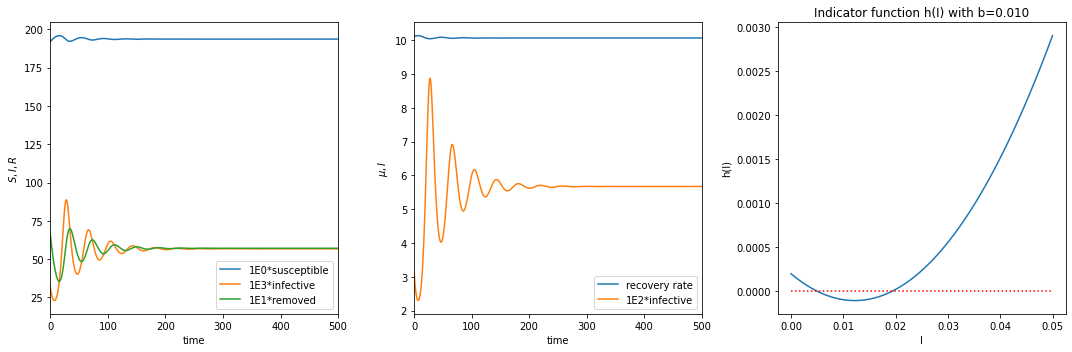

In [4]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)
plot_SIR(sol, mu0, mu1, beta, A, d, nu, b)
plt.savefig("./SIR_initial")

/Users/gaozhenhan/Desktop/TUM/3FS/MLCMS/EX4 Bifurcation and Visualization (2023-05-29 until 2023-06-12)/sir_model.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,3,figsize=(15,5))


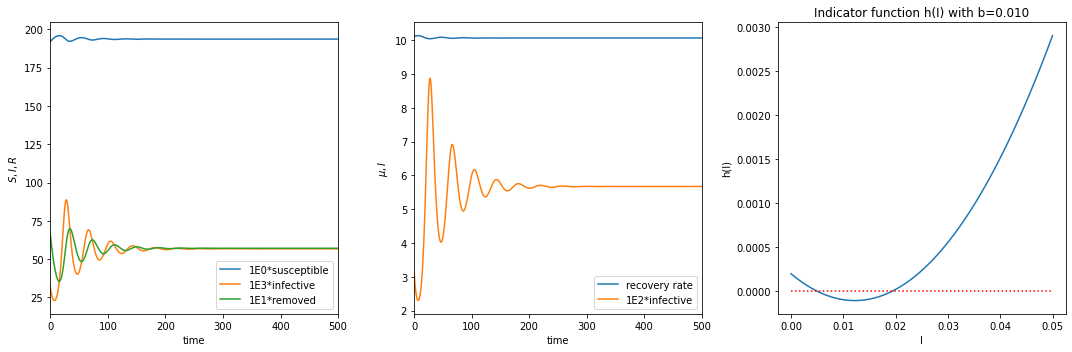

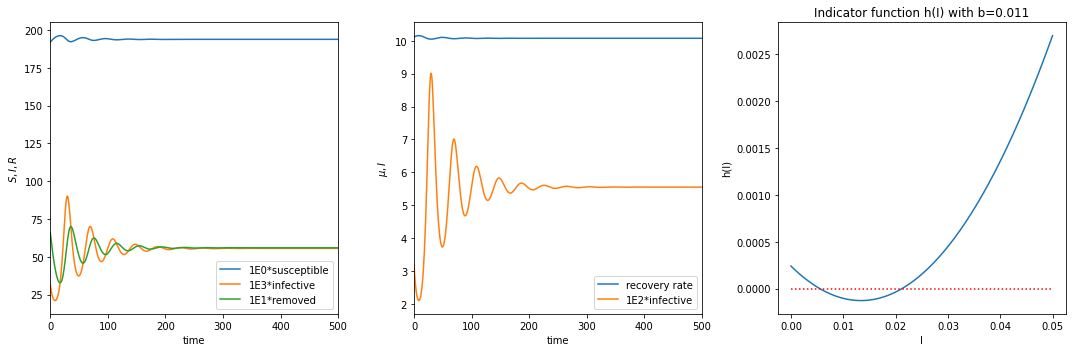

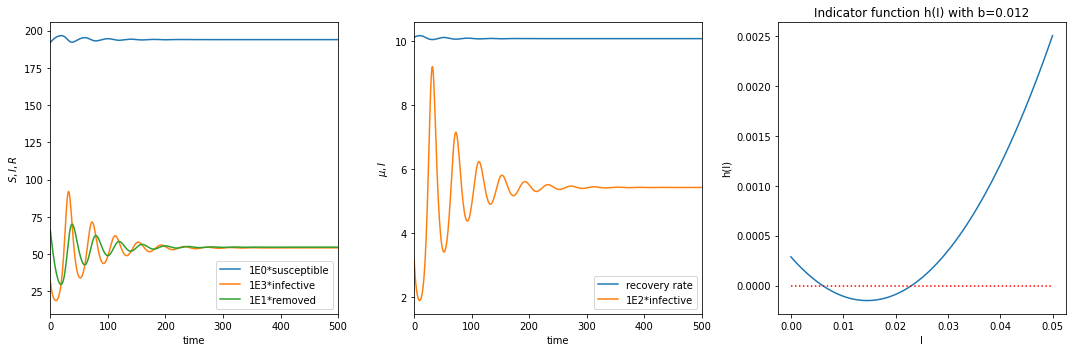

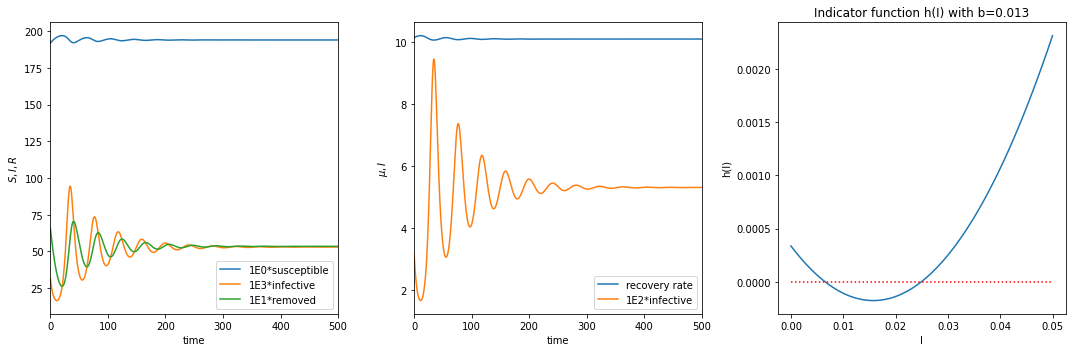

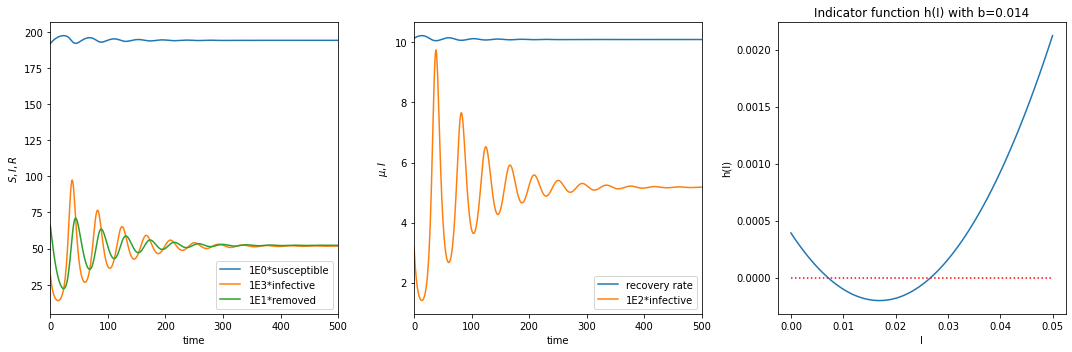

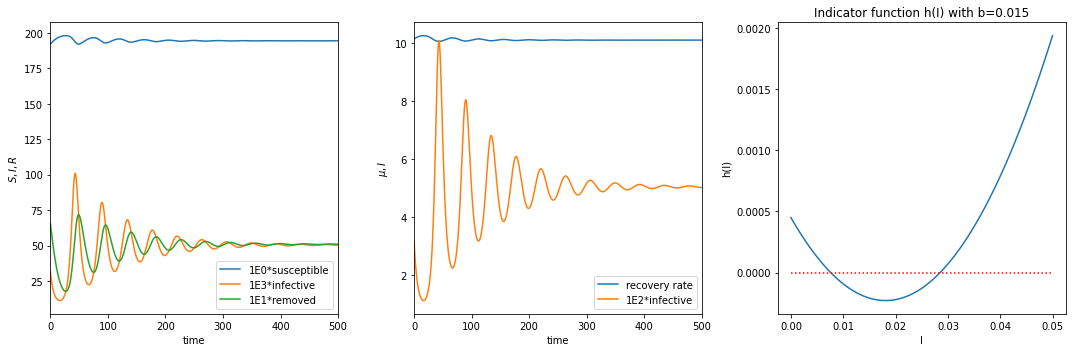

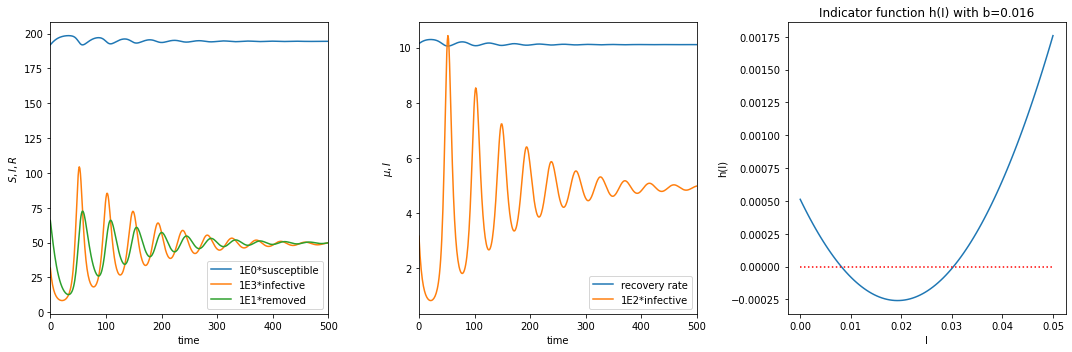

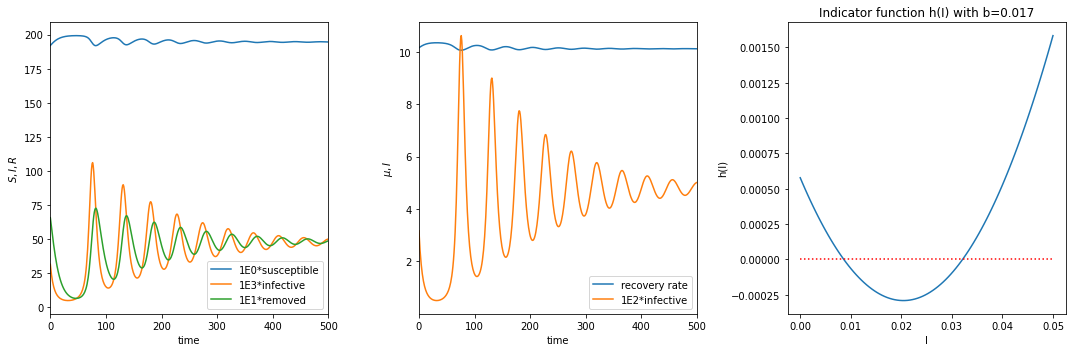

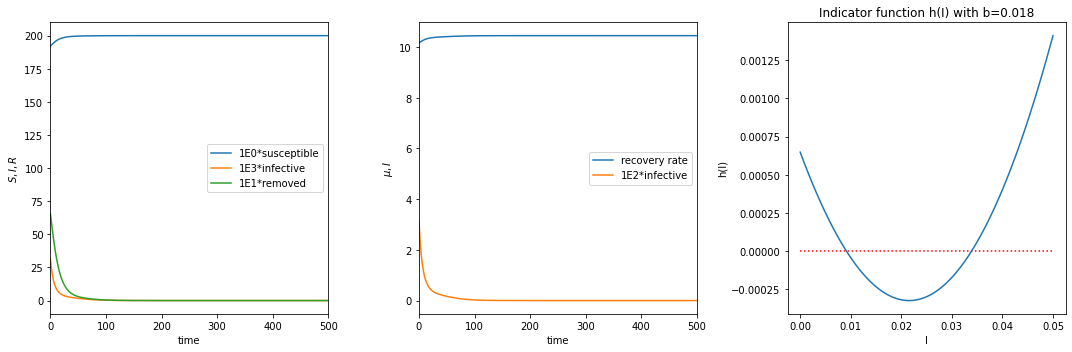

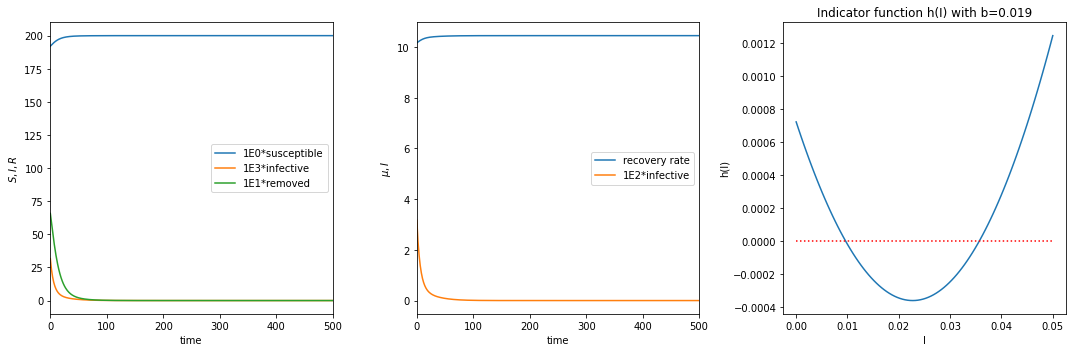

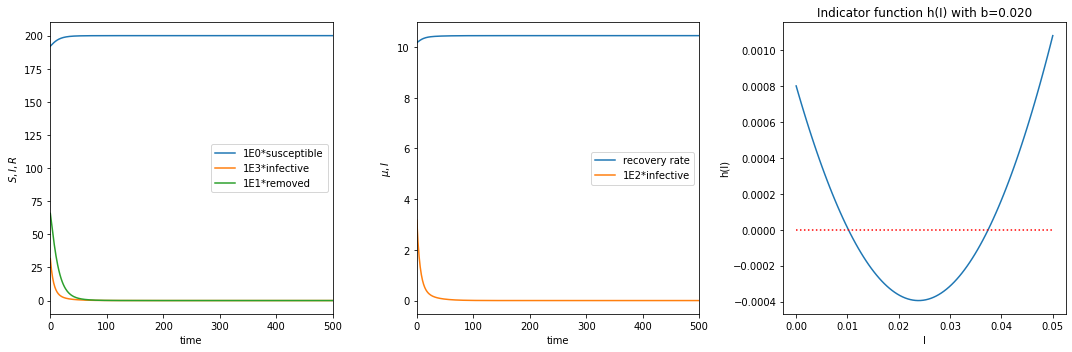

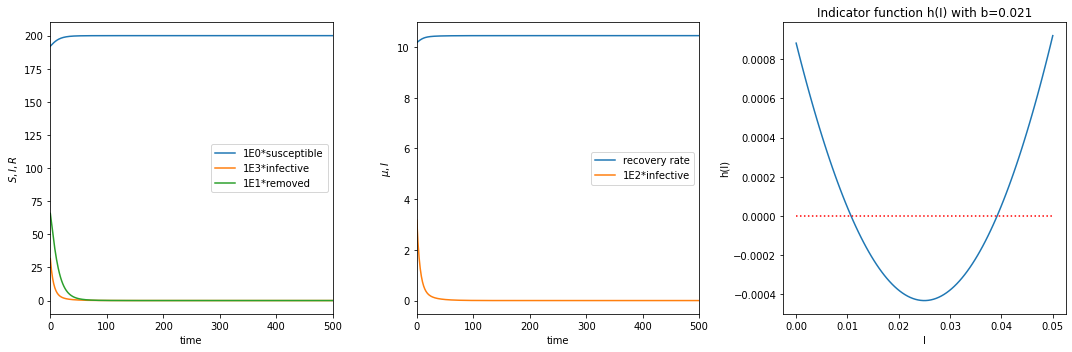

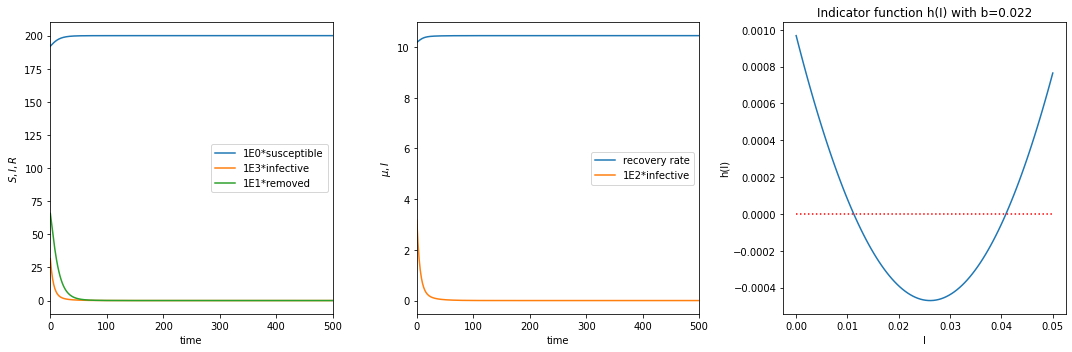

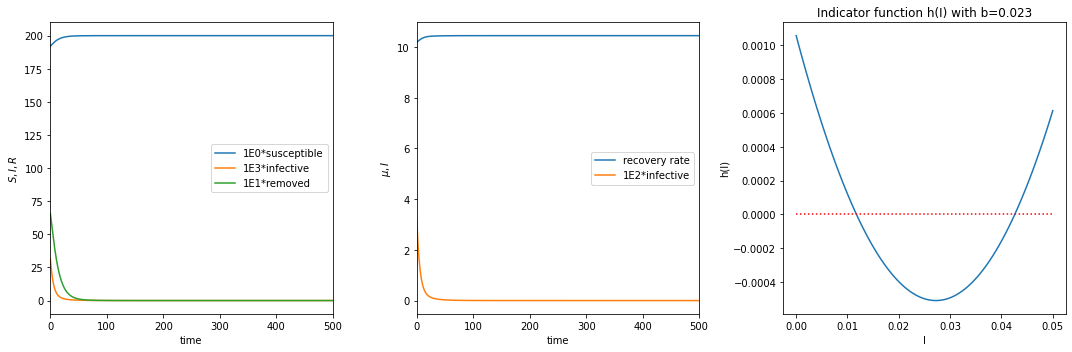

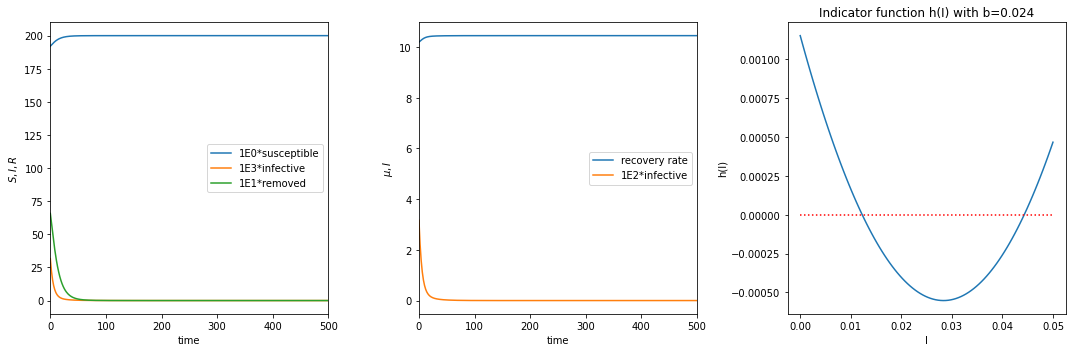

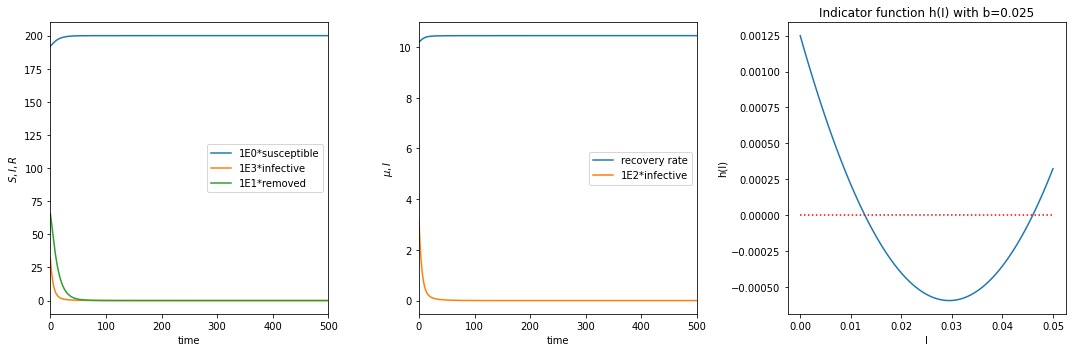

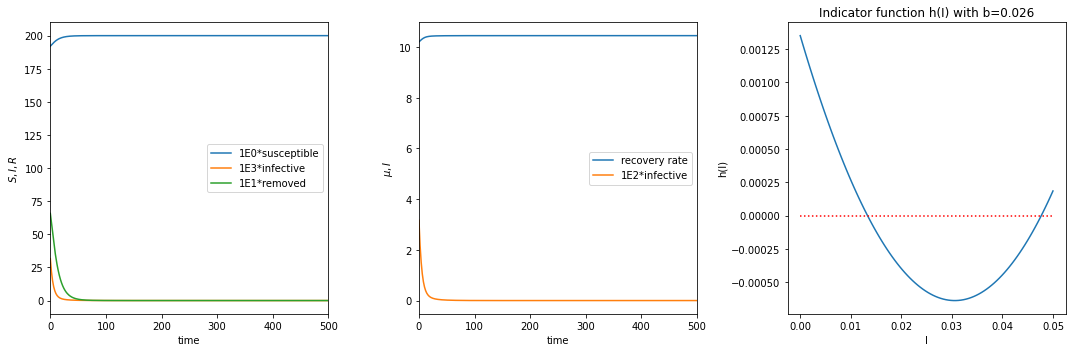

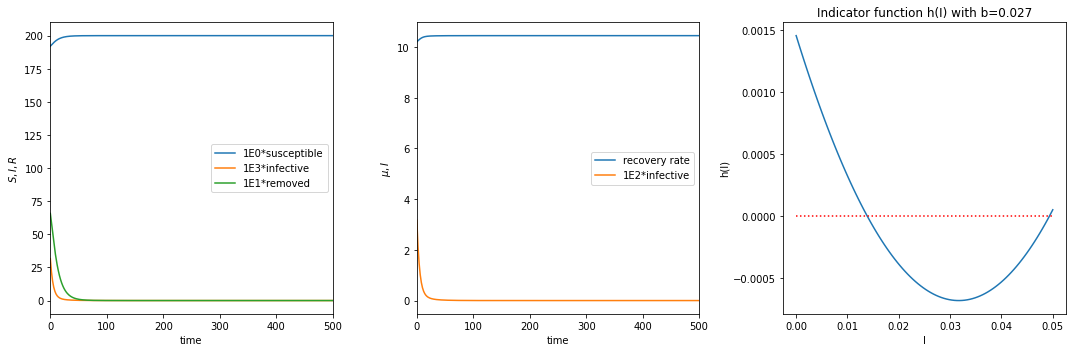

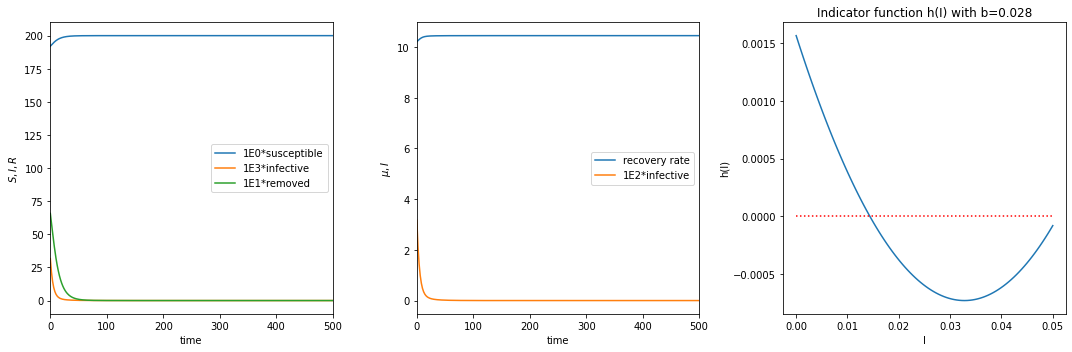

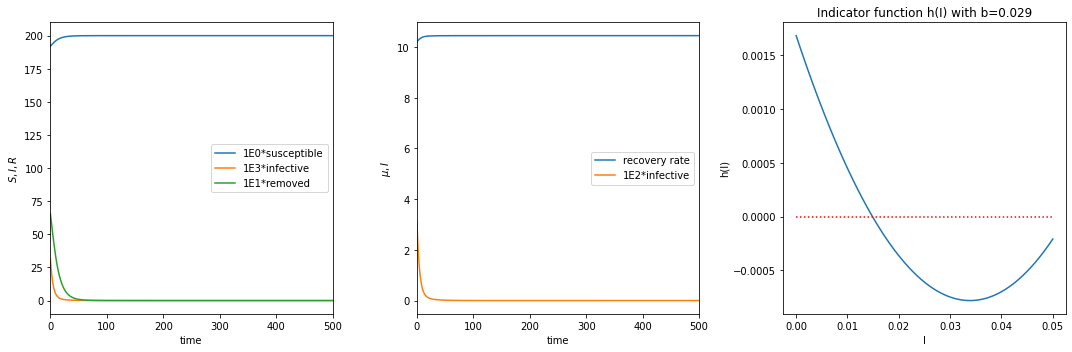

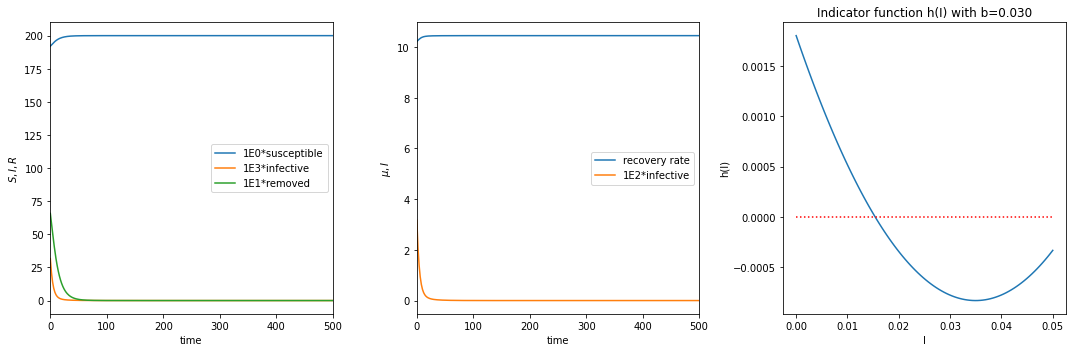

In [5]:
# Iterate over a range of values for 'b' 0.01-0.03, timestep=0.001
for b in np.arange(0.01,0.031,0.001):
    # Generate time points for the simulation
    time = np.linspace(t_0,t_end,NT)
    # Solve the SIR model using the given parameters and initial conditions
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)
    plot_SIR(sol, mu0, mu1, beta, A, d, nu, b)
    plt.savefig("./SIR_initial_with_b_{:.3f}.png".format(b))



/Users/gaozhenhan/Desktop/TUM/3FS/MLCMS/EX4 Bifurcation and Visualization (2023-05-29 until 2023-06-12)/sir_model.py:138: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(15,6))


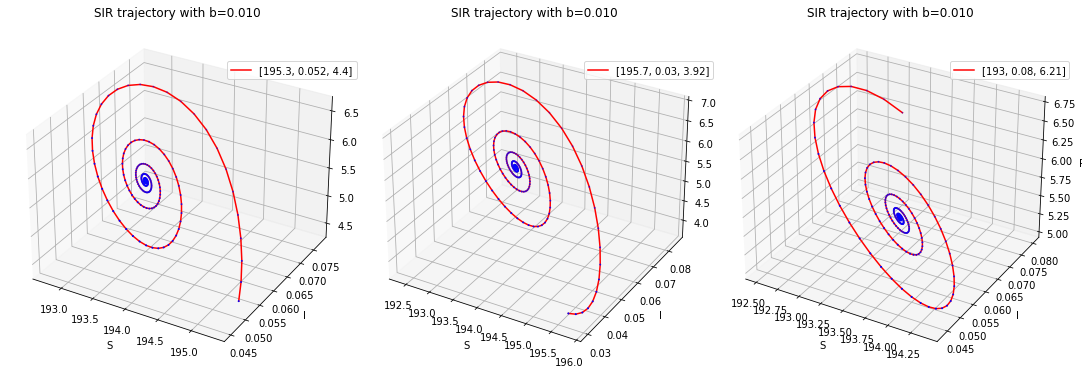

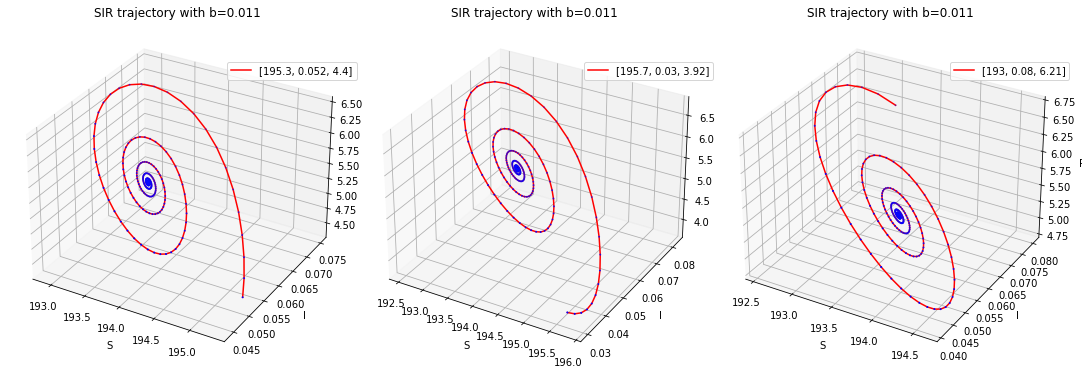

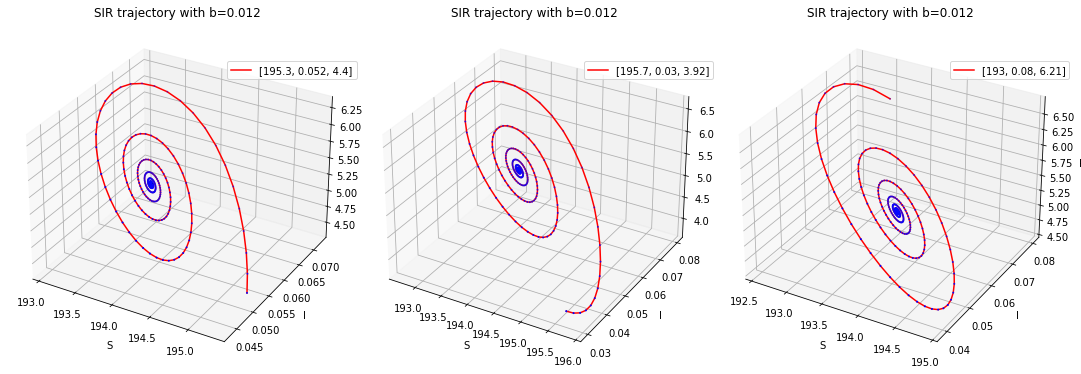

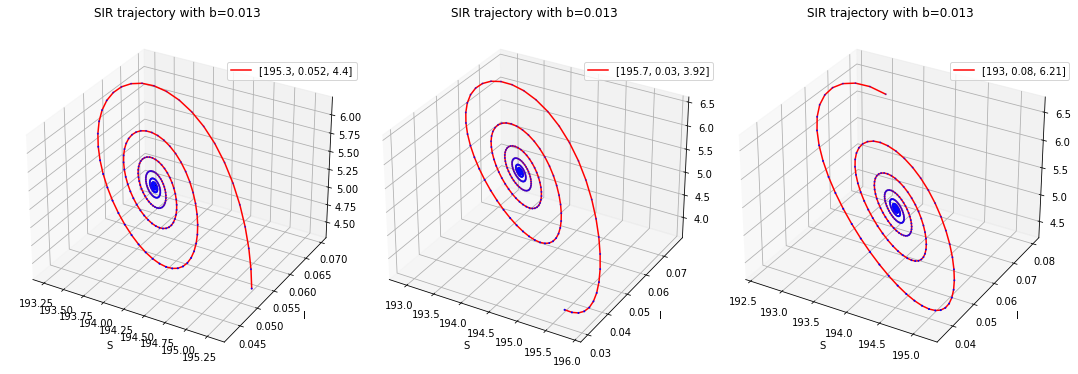

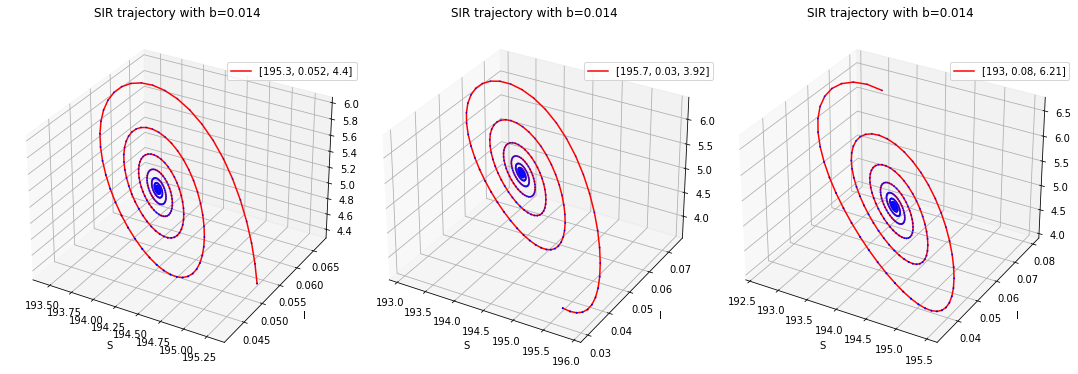

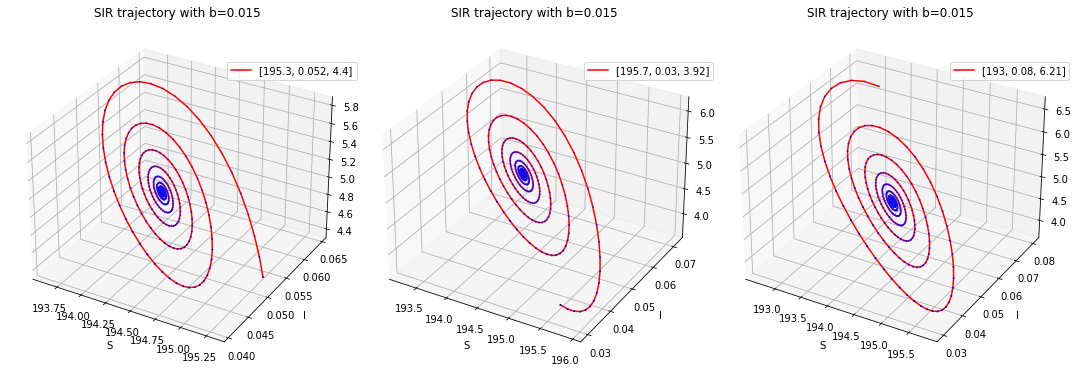

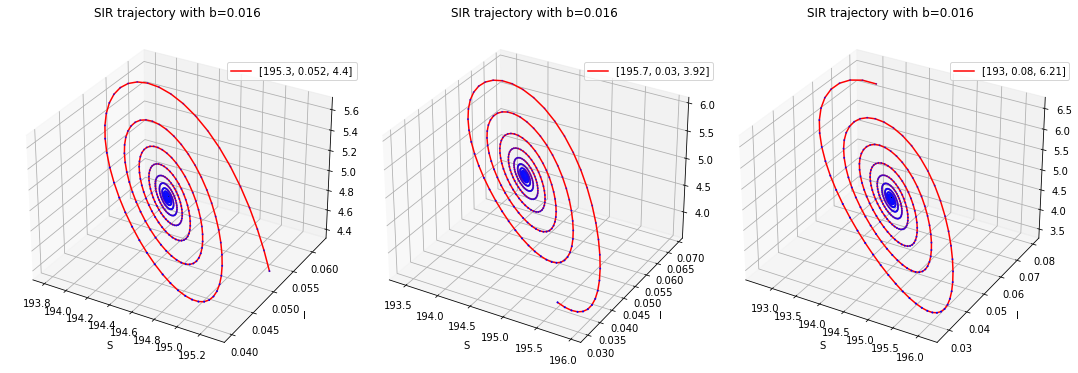

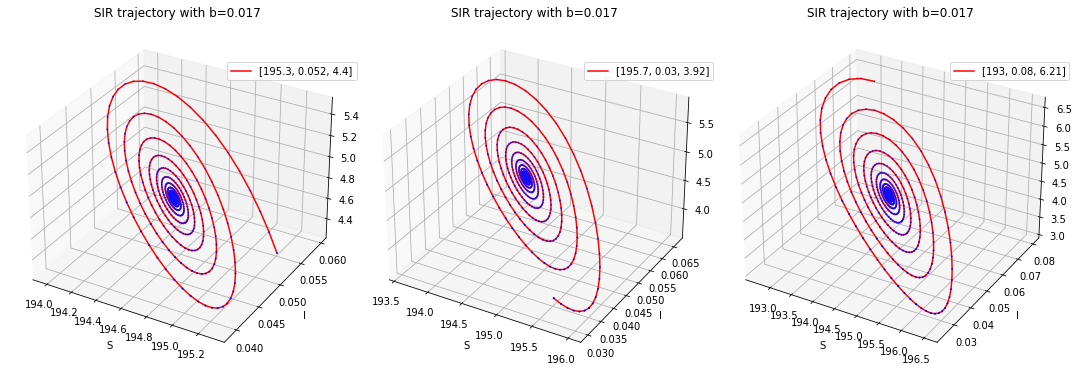

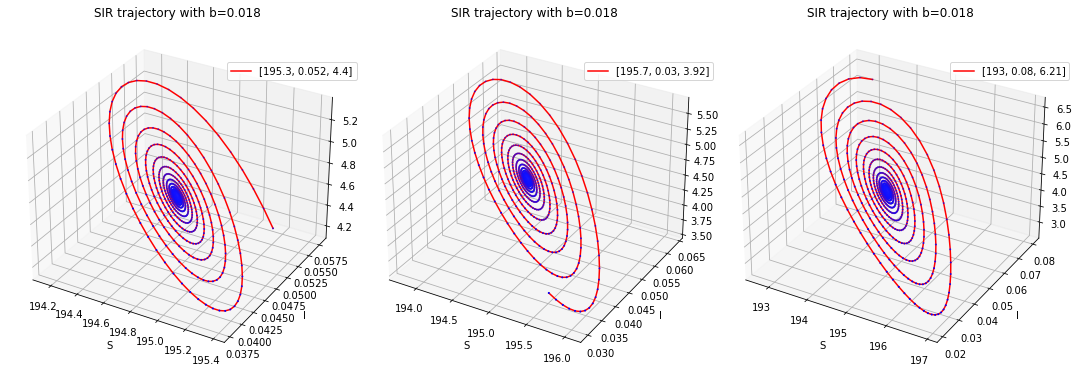

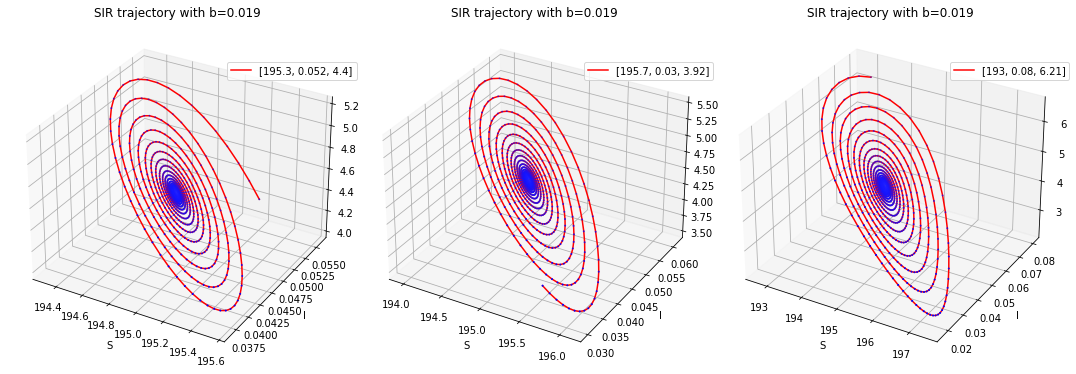

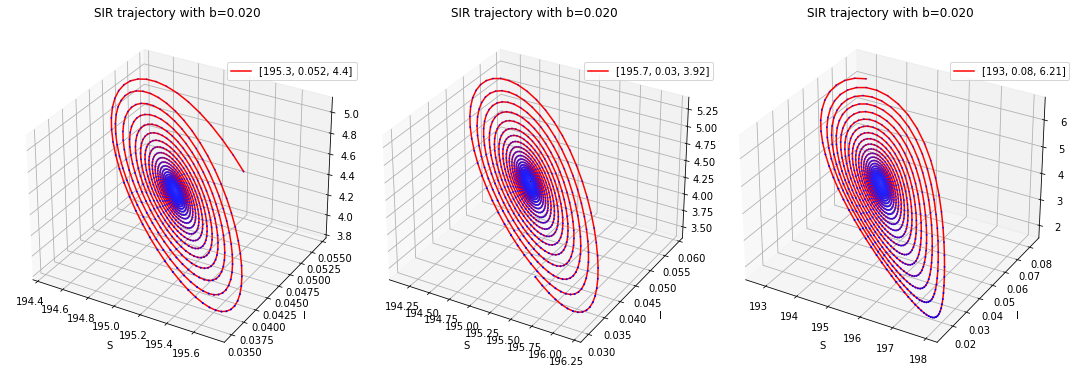

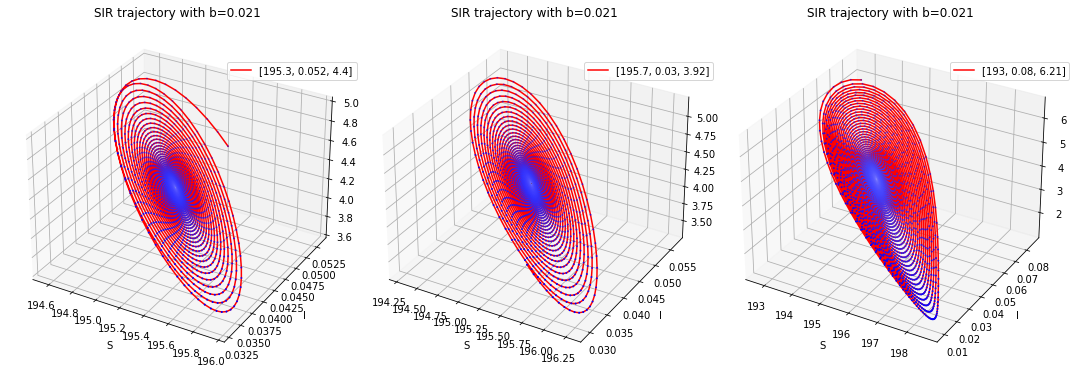

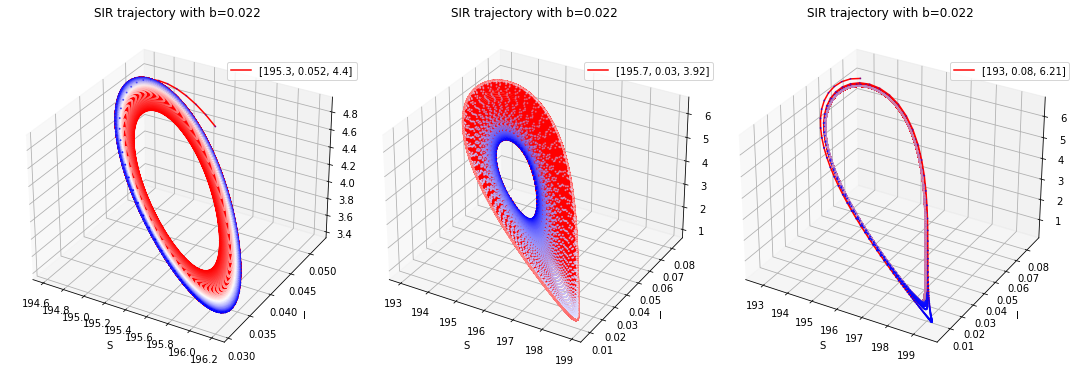

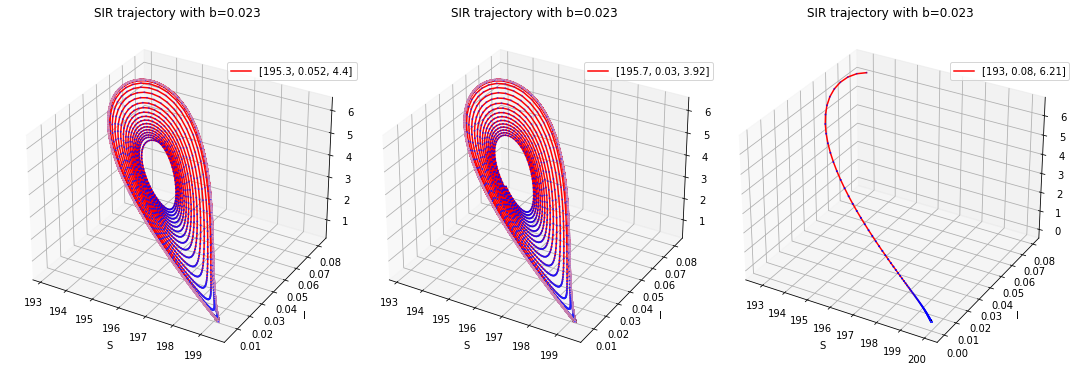

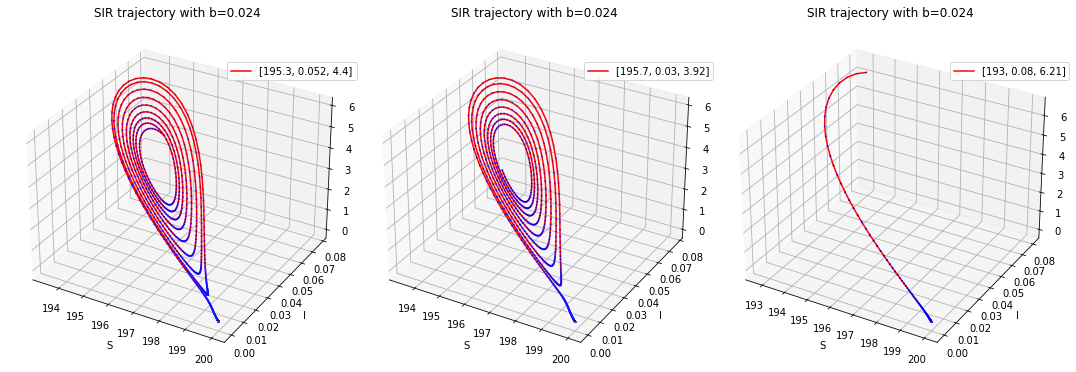

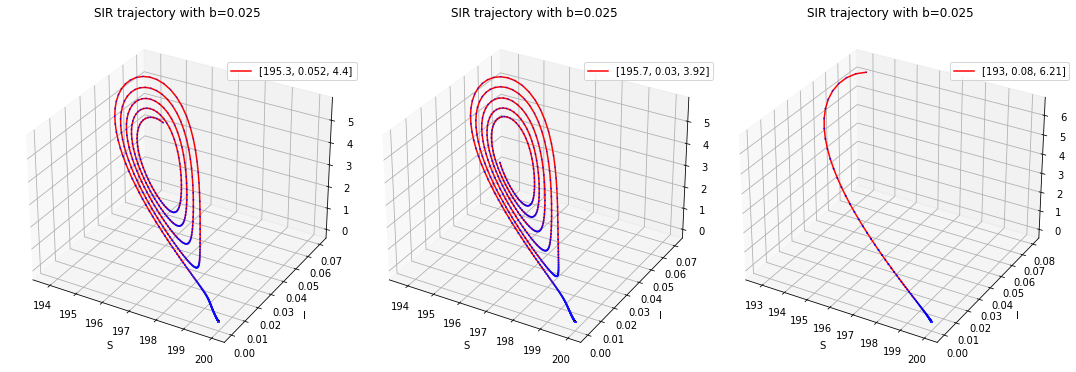

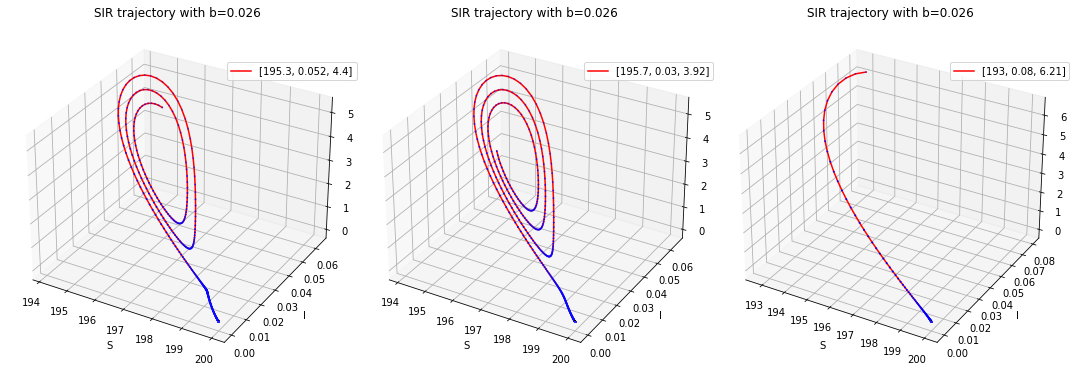

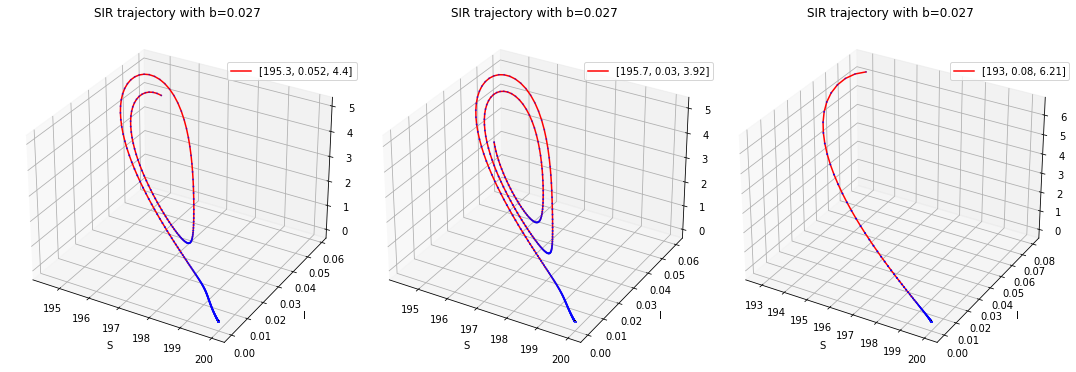

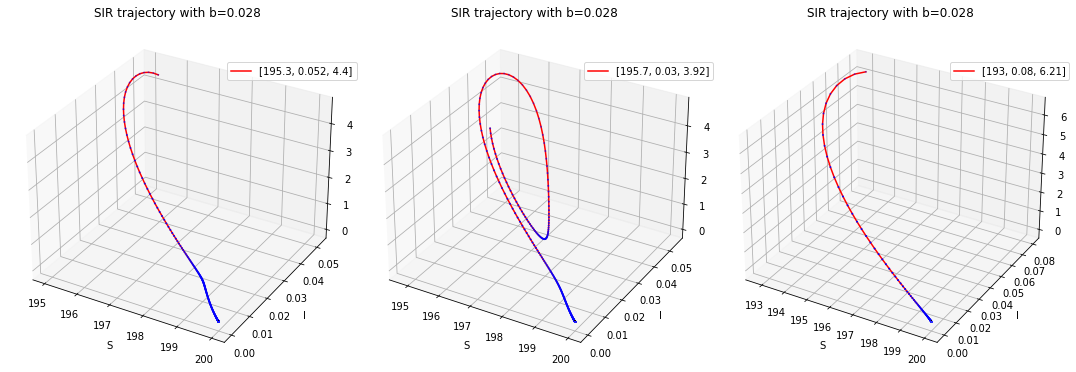

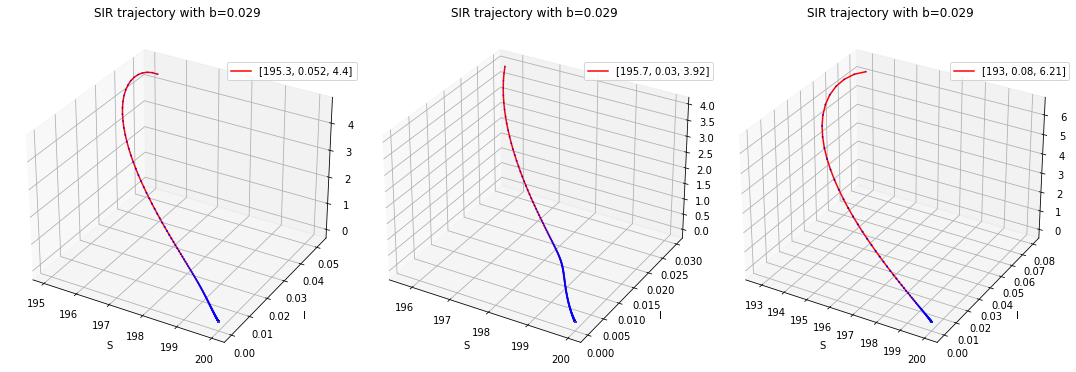

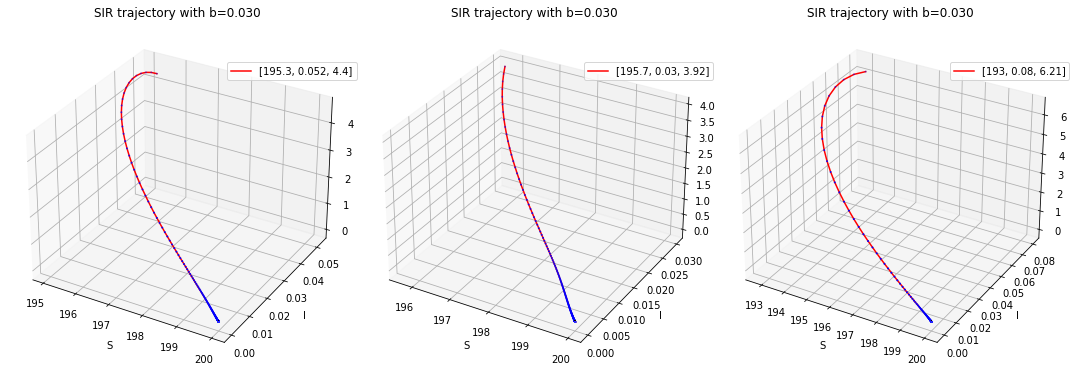

In [6]:
# Set the start and end time for the simulation
t_0 = 0
t_end = 15000
NT = t_end-t_0

time = np.linspace(t_0,t_end,NT)

cmap = ["BuPu", "Purples", "bwr"][1]

# Iterate over a range of values for 'b'
for b in np.arange(0.01,0.031,0.001):
    # Define different initial conditions for the simulations
    SIM0_0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
    SIM0_1 = [195.7, 0.03, 3.92]
    SIM0_2 = [193, 0.08, 6.21]
    
    # Solve the SIR model for each initial condition and 'b' value
    sol_0 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    sol_1 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_1, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    sol_2 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_2, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    
    # Plot the SIR trajectories for the current 'b' value
    plot_SIR_trajectory(b,time,sol_0,sol_1,sol_2,SIM0_0,SIM0_1,SIM0_2)
    plt.savefig("./SIR_trajectory_with_b_{:.3f}.png".format(b))

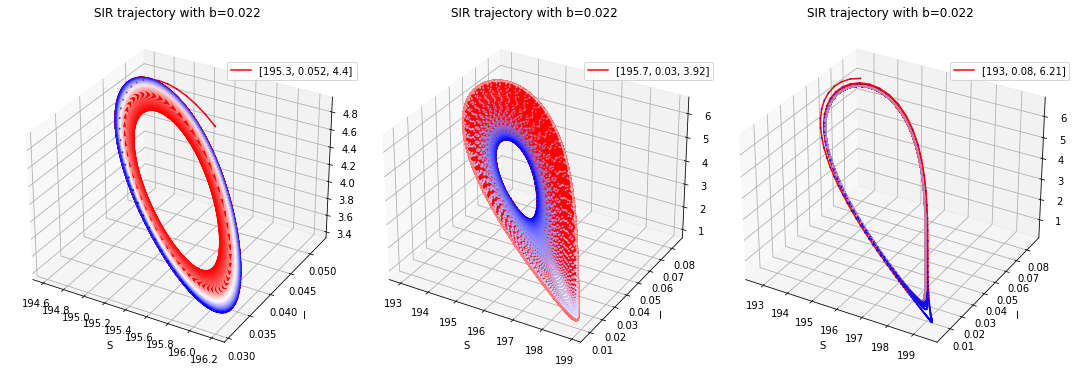

In [7]:
#set b = 0.022
b=0.022
t_0 = 0
t_end = 15000
NT = t_end-t_0

time = np.linspace(t_0,t_end,NT)

cmap = ["BuPu", "Purples", "bwr"][1]

# Define the initial conditions for the simulations
SIM0_0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
SIM0_1 = [195.7, 0.03, 3.92]
SIM0_2 = [193, 0.08, 6.21]

# Solve the SIR model for each initial condition and b = 0.022
sol_0 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
sol_1 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_1, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
sol_2 = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0_2, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)

# Plot the SIR trajectories for the given initial conditions and b = 0.022
plot_SIR_trajectory(b,time,sol_0,sol_1,sol_2,SIM0_0,SIM0_1,SIM0_2)
plt.savefig("./SIR_trajectory_with_0.022.png")

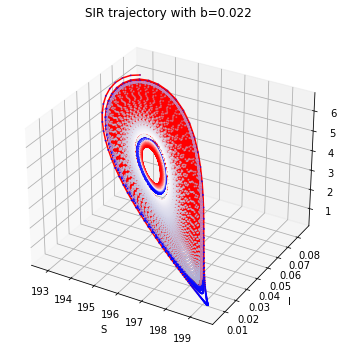

In [8]:
#plot the simulations for three different conditions in one image
b=0.022
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")
time = np.linspace(t_0,15000,NT)

cmap = ["BuPu", "Purples", "bwr"][1]

# Simulate and plot the first trajectory
SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-',label='SIM0 = [195.3, 0.052, 4.4] ');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');

# Simulate and plot the second trajectory
SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-',label='SIM0 = [195.7, 0.03, 3.92] ');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap);

# Simulate and plot the third trajectory
SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-',label='SIM0 = [193, 0.08, 6.21] ');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');


# Set labels and title
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")

ax.set_title("SIR trajectory with b="+ "{:.3f}".format(b)) 
fig.tight_layout()
plt.savefig("./SIR trajectory with 0.022.png")

### Task 5-7 Bonus

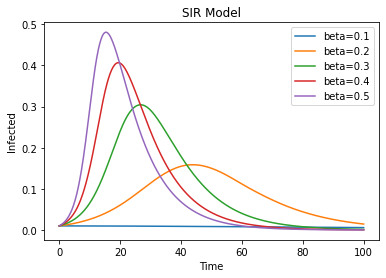

In [9]:
# Specify the parameter values to explore
beta_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Call the function to plot the backward bifurcation
plot_backward_bifurcation(beta_values)